In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Read DATASETS

In [2]:

fake = pd.read_csv(r"C:\Users\DELL\Desktop\csv_excel file\Fake.csv")
‪
    
#true = pd.read_csv(r"‪‪C:\Users\DELL\Desktop\csv_excel file\_True.csv")

In [3]:
fake.shape

(23481, 4)

In [4]:
true= pd.read_csv(r"C:\Users\DELL\Desktop\csv_excel file\True.csv")

In [5]:
true.shape

(21417, 4)

# Data cleaning & preparation

In [6]:
fake.head(3)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"


In [7]:
true.head(2)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"


In [8]:
fake['target'] = 'fake'
true['target'] = 'true'

In [9]:
fake.head(3)

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake


In [10]:
true.head(2)

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true


In [11]:
print("shape of fake dataset : ", fake.shape, "\nshape of true dataset : ",fake.shape)

shape of fake dataset :  (23481, 5) 
shape of true dataset :  (23481, 5)


In [12]:
# now concatenate both dataframes
_data = pd.concat([fake, true])
_data.shape

(44898, 5)

In [13]:
_data 

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true


In [14]:
_data.tail() # there are 44898 rows but still show in the last 21416,
            #therefore some inconsistency existing in data set

,title,text,subject,date,target
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",true


In [15]:
data = pd.concat([fake, true]).reset_index(drop = True) # now rows are 44898
data    # in first half there are fake data then in 2nd half true data.

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true


In [16]:
data.shape

(44898, 5)

In [17]:
data.tail()

,title,text,subject,date,target
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",true


In [18]:
# shuffle the data
from sklearn.utils import shuffle # used sklearn utilities
data  = shuffle(data)     # in every execution output index will be differentt 
data = data.reset_index() 

In [19]:
data.head()

,index,title,text,subject,date,target
0,23686,White House to host fresh biofuels talks to he...,(Reuters) - The White House will host talks be...,politicsNews,"December 12, 2017",true
1,43031,German court finds Syrian guilty over U.N. pea...,BERLIN (Reuters) - A Syrian man living in Germ...,worldnews,"September 20, 2017",true
2,28978,Abe 'optimistic' about positive outcome to tra...,WASHINGTON (Reuters) - Japanese Prime Minister...,politicsNews,"February 10, 2017",true
3,43417,U.S. nearing limits of diplomacy on North Kore...,WASHINGTON (Reuters) - White House national se...,worldnews,"September 15, 2017",true
4,36877,"Bolivia's Morales says he'll seek fourth term,...",LA PAZ (Reuters) - Bolivian President Evo Mora...,worldnews,"November 30, 2017",true


In [20]:
from sklearn.utils import shuffle
data  = shuffle(data)
data = data.reset_index(drop = True)
data.head()

,index,title,text,subject,date,target
0,9933,‘Empty Barrels Make the Most Noise’ – General ...,Fox News received an email from General John K...,politics,"Sep 11, 2017",fake
1,21791,(VIDEO) SICKENING CHALLENGE GOES VIRAL: DISRES...,"A sick new challenge is going viral, urging ...",left-news,"May 1, 2015",fake
2,6268,EVEN MORE White Nationalists Are Trump Delega...,"The American Freedom Party (AFP), a third-way,...",News,"May 20, 2016",fake
3,3561,Breitbart’s War On Kellog Backfires SPECTACUL...,When Kellogg pulled its advertising from the w...,News,"December 4, 2016",fake
4,38691,East Congo militiamen go on trial for raping c...,"GOMA, Democratic Republic of Congo (Reuters) -...",worldnews,"November 9, 2017",true


In [21]:
data.shape

(44898, 6)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    44898 non-null  int64 
 1   title    44898 non-null  object
 2   text     44898 non-null  object
 3   subject  44898 non-null  object
 4   date     44898 non-null  object
 5   target   44898 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


In [23]:
# now remove unnecessary column
# removed title because all relevant information exist in text column
data.drop(["title"], axis=1, inplace = True)
data.head()

,index,text,subject,date,target
0,9933,Fox News received an email from General John K...,politics,"Sep 11, 2017",fake
1,21791,"A sick new challenge is going viral, urging ...",left-news,"May 1, 2015",fake
2,6268,"The American Freedom Party (AFP), a third-way,...",News,"May 20, 2016",fake
3,3561,When Kellogg pulled its advertising from the w...,News,"December 4, 2016",fake
4,38691,"GOMA, Democratic Republic of Congo (Reuters) -...",worldnews,"November 9, 2017",true


In [24]:
data.head()

,index,text,subject,date,target
0,9933,Fox News received an email from General John K...,politics,"Sep 11, 2017",fake
1,21791,"A sick new challenge is going viral, urging ...",left-news,"May 1, 2015",fake
2,6268,"The American Freedom Party (AFP), a third-way,...",News,"May 20, 2016",fake
3,3561,When Kellogg pulled its advertising from the w...,News,"December 4, 2016",fake
4,38691,"GOMA, Democratic Republic of Congo (Reuters) -...",worldnews,"November 9, 2017",true


In [25]:
# now remove date column 
data.drop(["date"], axis = 1, inplace = True)
data

,index,text,subject,target
0,9933,Fox News received an email from General John K...,politics,fake
1,21791,"A sick new challenge is going viral, urging ...",left-news,fake
2,6268,"The American Freedom Party (AFP), a third-way,...",News,fake
3,3561,When Kellogg pulled its advertising from the w...,News,fake
4,38691,"GOMA, Democratic Republic of Congo (Reuters) -...",worldnews,true
...,...,...,...,...
44893,15561,Do you know who this is? He is Edward Ed Mez...,politics,fake
44894,21102,"So far, the Supreme Court has not prevented on...",left-news,fake
44895,38861,SEOUL (Reuters) - By the time Donald Trump dep...,worldnews,true
44896,34339,WASHINGTON (Reuters) - The U.S. Department of ...,politicsNews,true


In [26]:
# convert the all data into lowercase
data["text"] = data["text"].apply(lambda x:x.lower())
data.head()

,index,text,subject,target
0,9933,fox news received an email from general john k...,politics,fake
1,21791,"a sick new challenge is going viral, urging ...",left-news,fake
2,6268,"the american freedom party (afp), a third-way,...",News,fake
3,3561,when kellogg pulled its advertising from the w...,News,fake
4,38691,"goma, democratic republic of congo (reuters) -...",worldnews,true


In [27]:
# removing punctuation

import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = " ".join(all_list)
    return clean_str

data["text"] = data["text"].apply(punctuation_removal)

In [28]:
data.head()

,index,text,subject,target
0,9933,f o x n e w s r e c e i v e d a n e m ...,politics,fake
1,21791,a s i c k n e w c h a l l e n g e ...,left-news,fake
2,6268,t h e a m e r i c a n f r e e d o m p a ...,News,fake
3,3561,w h e n k e l l o g g p u l l e d i t s ...,News,fake
4,38691,g o m a d e m o c r a t i c r e p u b l i ...,worldnews,true


In [29]:
# Removing stopwords
import nltk # natural language tool kit API
nltk.download("stopwords")
from nltk.corpus import stopwords
stop = stopwords.words("english")
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
data.head()

,index,text,subject,target
0,9933,f x n e w r e c e v e n e l f r g e n e r l j ...,politics,fake
1,21791,c k n e w c h l l e n g e g n g v r l u r g n ...,left-news,fake
2,6268,h e e r c n f r e e p r f p h r w w h e n n l ...,News,fake
3,3561,w h e n k e l l g g p u l l e v e r n g f r h ...,News,fake
4,38691,g e c r c r e p u b l c f c n g r e u e r e g ...,worldnews,true



# Basic data exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


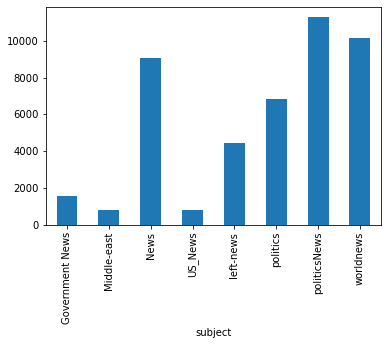

In [31]:
#how many articles per subject?

print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind='bar')
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


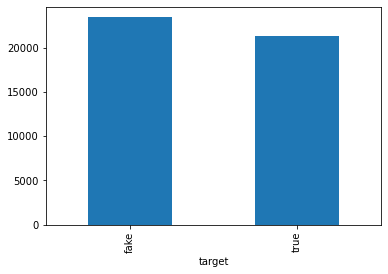

In [32]:
# how many fake and real article?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

In [33]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [34]:
# word cloud for fake news
# o/p-> all the words which are most frequintly appearing in fake news.

from wordcloud import WordCloud


In [35]:
fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width=800, height=500, max_font_size=110,
                      collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

ValueError: Only supported for TrueType fonts

In [ ]:
# which is most frequintly used words

from nltk import tokenize
token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency",n=quantity)
    plt.figure(figsize = (12, 8))
    ax = sns.barplot(data = df_frequency, x = "Word", y= "Frequency", color = 'red')
    ax.set(ylabel = 'Count')
    plt.xticks(rotation = "vertical")
    plt.show()

In [ ]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text",20)

# Modeling